In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import seaborn as sns
from requests import get
from bs4 import BeautifulSoup

Let's start by loading the data in a dataframe.

In [2]:
df = pd.read_csv("games.csv")

**First look at the data**

In [10]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [49]:
print("There are %d unique games in this dataset." % (len(df.id.unique()))) 

There are 19113 unique games in this dataset.


In [4]:
df.columns 

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

**Ratings of the players**

Let's look at the rating of player. Note that the best players on lichess.org have a rating of almost 3000.
To do so, let's define a function *rating_analysis()* plotting the ratings in a histogram and giving some standard statistics.

In [45]:
def rating_analysis(ratings, color = "white"):
    #Plot the ratings in a histogram, with bins of size 50 (roughly)
    n_bins = int((np.max(ratings)-np.min(ratings))/50)
    plt.hist(ratings, bins = n_bins)
    plt.title("Ratings of the %s players" % (color))
    plt.xlabel("Ratings")
    plt.ylabel("Frequency")
    
    #Compute stardard statistics
    print("For the %s players, we have:" % (color) )
    print("  -a mean rating of %d," % (np.mean(ratings)))
    print("  -a median rating of %d," % (np.median(ratings)))
    print("  -a max rating of %d," % (np.max(ratings)))
    print("  -a min rating of %d." % (np.min(ratings)))

For the white players, we have:
  -a mean rating of 1596,
  -a median rating of 1567,
  -a max rating of 2700,
  -a min rating of 784.


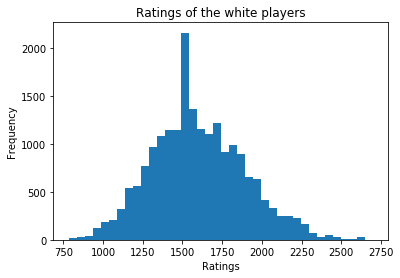

In [46]:
rating_analysis(df.white_rating)

For the black players, we have:
  -a mean rating of 1588,
  -a median rating of 1562,
  -a max rating of 2723,
  -a min rating of 789.


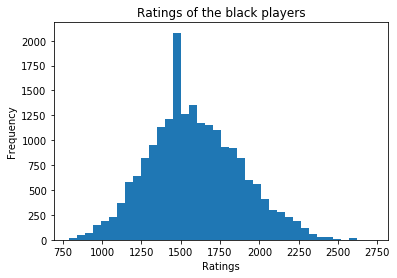

In [47]:
rating_analysis(df.black_rating, "black")

As expected, the results are pretty similar for black and white ratings since players are playing both colors in an equal manner.